In [1]:
import pytorch_lightning as pl
import torch
from src.train.train_2d import LitResUNet
from pytorch_lightning.loggers import TensorBoardLogger
from src.datasets.sun_rgbd import SunRGBDDataModule
from torch import multiprocessing

multiprocessing.set_start_method('spawn')

In [2]:
# from src.datasets.sun_rgbd import SunRGBDDataModule
# SunRGBDDataModule().prepare_data(get_samples=True)

In [3]:
def cut_off_batch_norm(ckpt_path):
    litResUnet = LitResUNet.load_from_checkpoint(ckpt_path)

    new_last_upconv = [layer for layer in litResUnet.model.last_upconv if not isinstance(layer, torch.nn.BatchNorm2d)]
    litResUnet.model.last_upconv = torch.nn.Sequential(*new_last_upconv)
    print(litResUnet.model)

    litResUnet.model.cuda()
    litResUnet.params.num_epochs = 50
    litResUnet.params.batch_size = 10
    litResUnet.config.model_ident = "DeResUNet2"

    return litResUnet


In [4]:
load_from_ckpt = "model_checkpoints/resResUNetP_X_final2.ckpt"

In [5]:
if load_from_ckpt is not None:
   litResUnet = LitResUNet.load_from_checkpoint(load_from_ckpt)
   litResUnet.model.cuda()
   litResUnet.params.num_epochs = 100
   litResUnet.params.batch_size = 10
   litResUnet.params.num_workers = 8
   litResUnet.config.model_ident = "DeResUNet2"
   litResUnet.data_module = SunRGBDDataModule(
      batch_size=litResUnet.params.batch_size,
      num_workers=litResUnet.params.num_workers,
      pin_memory=litResUnet.config.pin_memory,
      verbose=litResUnet.verbose,
   )
   litResUnet.data_module.setup("init")
   # litResUnet = cut_off_batch_norm(load_from_ckpt)
else:
    litResUnet = LitResUNet(num_epochs=50, batch_size=6, num_samples=-1, num_workers=8, resize=0.5, pin_memory=False, learning_rate=0.0001)


Data root directory: /home/jduchscherer/semanticsegmentation/.data
Metadata directory: /home/jduchscherer/semanticsegmentation/.data/SUNRGBDtoolbox/Metadata
Metadata file: /home/jduchscherer/semanticsegmentation/.data/SUNRGBD/meta/meta_full.csv
Stats file: /home/jduchscherer/semanticsegmentation/.data/SUNRGBD/meta/sunrgbd_stats.yaml

    <<<<<<<<<<<<<<<<<<<<PyTorch Lightning Model>>>>>>>>>>>>>>>>>>>>>>
    -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
    Config(data_path='.data/nyu_depth_v2_labeled.mat', model_path='.models_2d', model_ident='pResResUNet_50_sunrgbd', device='cuda', random_seed=42, verbose=True, print_model=False, checkpoints_path='model_checkpoints', show_all_nepochs=1, pin_memory=False)
    Hyperparameters(resize=0.5, num_epochs=20, batch_size=6, num_workers=0, learning_rate=0.0001, num_classes=38)
    model_pred shape: torch.Size([1, 38, 416, 576]), dtype: torch.float32
    
Data root directory: /home/jduchscherer/semanticsegmentation/.data
Metada

[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]


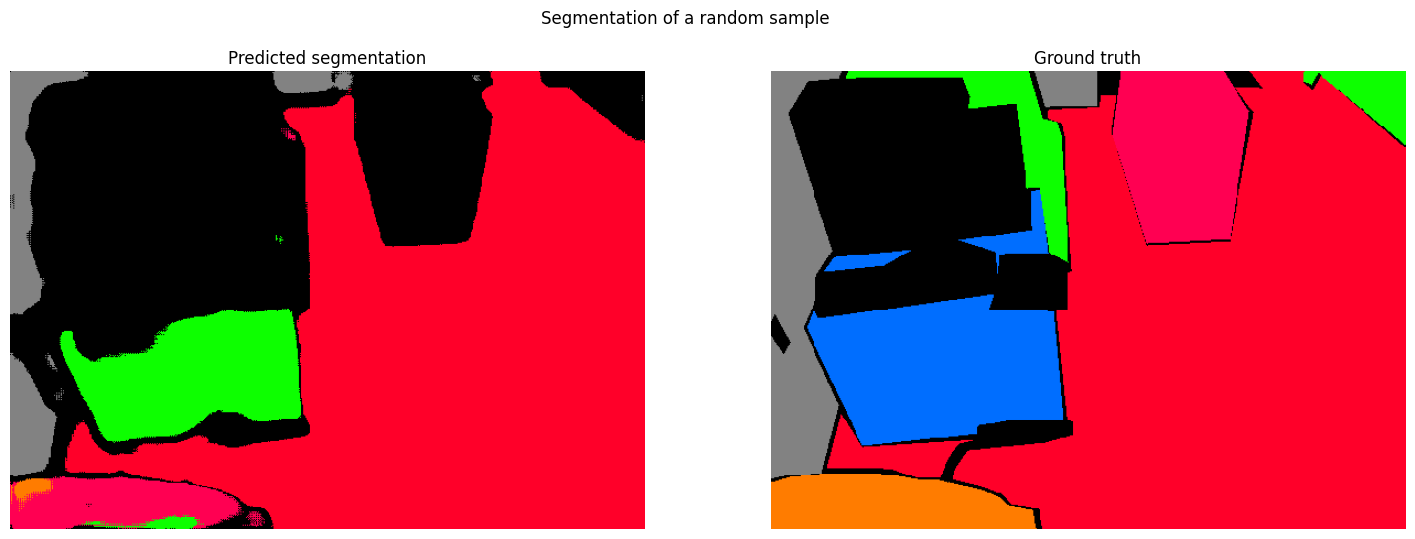

In [6]:
litResUnet.setup('validate')
litResUnet.show_segmented(logging=False)

In [7]:
logger = TensorBoardLogger("lightning_logs", name=litResUnet.config.model_ident)
trainer = pl.Trainer(
        logger=litResUnet.logger,
        max_epochs=litResUnet.params.num_epochs,
        accumulate_grad_batches=2,
        fast_dev_run=False,
        log_every_n_steps=20,
        callbacks=[litResUnet.checkpoint_callback, litResUnet.early_stopping_callback],
    )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]


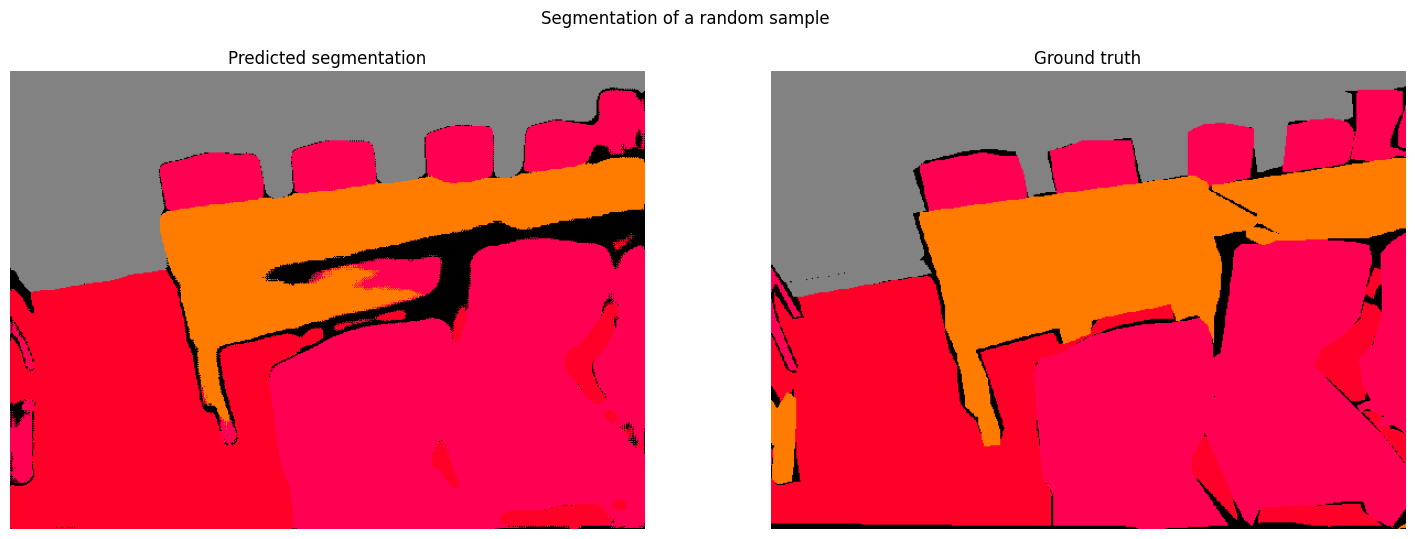

/home/jduchscherer/semanticsegmentation/.venv/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:615: UserWarning: Checkpoint directory /home/jduchscherer/semanticsegmentation/model_checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type                   | Params
------------------------------------------------------
0 | model      | ResUNet                | 203 M 
1 | metric_iou | MulticlassJaccardIndex | 0     
2 | criterion  | CrossEntropyLoss       | 0     
------------------------------------------------------
203 M     Trainable params
0         Non-trainable params
203 M     Total params
815.122   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated b

Training: 0it [00:00, ?it/s]

[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CudaIPCTypes.cpp:15] Producer process has been terminated b

OutOfMemoryError: CUDA out of memory. Tried to allocate 176.00 MiB (GPU 0; 23.69 GiB total capacity; 12.91 GiB already allocated; 173.00 MiB free; 13.32 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [8]:
litResUnet.setup('fit')
litResUnet.setup('validate')
litResUnet.show_segmented(logging=False)
trainer.fit(litResUnet)

In [ ]:
trainer.save_checkpoint("model_checkpoints/resResUNetP_X_final3.ckpt")